# Hypothesis 1

There is a relation between EEG signal and 3 levels of stress.

For each pair of person and task, there are 3 distinct groups of EEG signals representing the 3 levels of stress.

In [1]:
import pandas as pd
pandasRaw = pd.read_csv("data/nuttasit_mathstress_2021-08-12-08.09.53.csv")


def marker_converter(pandasRaw):
    marker_idx = list(pandasRaw['Marker'].unique())
    # print(marker_idx)
    new_marker = []
    for data in pandasRaw['Marker']:
        if(data == '0' or data == 0):
            i = 0
        else:
            i = marker_idx.index(data)
        new_marker.append(i)
    set(new_marker)
    pandasRaw['Marker'] = new_marker
    pandasRaw = pandasRaw.drop(columns='timestamps')
    return pandasRaw,marker_idx

pandasRaw,marker_idx = marker_converter(pandasRaw)
pandasRaw

/home/akrarads/venv/hci/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Fp1,Fp2,F3,F4,F7,F8,O1,O2,Marker
0,-15380.414,10622.711,8979.701,11114.428,-960.231,12954.177,-2743.721,-5477.429,0
1,-15404.018,10604.338,8962.625,11094.087,-979.141,12931.445,-2757.959,-5487.845,0
2,-15413.920,10594.683,8951.717,11081.414,-986.830,12919.264,-2769.873,-5501.927,0
3,-15393.915,10612.676,8960.792,11095.160,-975.676,12937.637,-2763.726,-5495.958,0
4,-15376.212,10623.158,8976.416,11111.410,-959.873,12955.854,-2746.359,-5478.323,0
...,...,...,...,...,...,...,...,...,...
216079,-10235.848,10159.494,8221.978,10392.958,511.698,12259.775,-1590.908,-5159.699,0
216080,-10236.786,10159.852,8221.485,10391.080,511.184,12256.154,-1590.528,-5164.460,0
216081,-10259.093,10141.143,8201.883,10367.946,491.135,12234.250,-1616.992,-5188.198,0
216082,-10268.279,10131.621,8192.630,10359.608,481.255,12227.142,-1629.263,-5197.607,0


In [2]:
for marker in pandasRaw['Marker'].unique():
    print(marker, marker_idx[marker])

0 0
1 math,LowStress,start
2 math,LowStress,S
3 math,LowStress,T
4 fixation,None,None
5 math,LowStress,F
6 math,MildStress,start
7 math,MildStress,T
8 math,MildStress,S
9 math,MildStress,F
10 math,HigherStress,start
11 math,HigherStress,S
12 math,HigherStress,T
13 math,HigherStress,F


In [3]:
import mne
def pandasObject_to_mneRaw(pandasObject, sfreq):
    ch_names = list(pandasObject.columns)
    ch_types = ['eeg'] * (len(pandasObject.columns) - 1) + ['stim']
    ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

    pandasObject = pandasObject.T  #mne looks at the tranpose() format
    pandasObject[:-1] *= 1e-6  #convert from uVolts to Volts (mne assumes Volts data)

    info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq, verbose=False)

    raw = mne.io.RawArray(pandasObject, info,verbose=False)
    raw.set_montage(ten_twenty_montage)
    # raw.plot()
    return raw

In [4]:
raw = pandasObject_to_mneRaw(pandasRaw, sfreq=250)

In [5]:
# Preprocess
raw.notch_filter([50,100],filter_length='auto', phase='zero', verbose=False) # Line power
raw.filter(1, None, verbose=False) # Slow drift
pass
# ica = mne.preprocessing.ICA(n_components=8, max_iter='auto')
# ica.fit(raw, verbose=False)
# raw = ica.apply(raw, verbose=False)

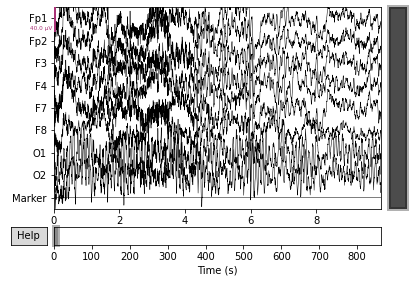

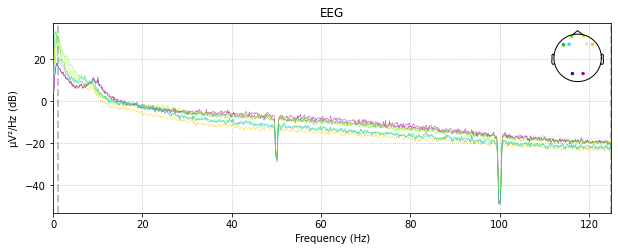

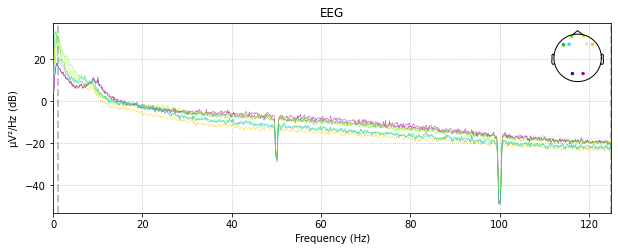

In [6]:
raw.plot()
raw.plot_psd()

In [7]:
import numpy as np
print(marker_idx)
events = mne.find_events(raw, stim_channel='Marker', initial_event=True, verbose=False, uint_cast=False)
events = np.delete(events, np.argwhere(events[:,2] == marker_idx.index('math,LowStress,S')), axis=0) # break
events = np.delete(events, np.argwhere(events[:,2] == marker_idx.index('math,LowStress,T')), axis=0) # break
events = np.delete(events, np.argwhere(events[:,2] == marker_idx.index('math,LowStress,F')), axis=0) # break
events = np.delete(events, np.argwhere(events[:,2] == marker_idx.index('math,MildStress,S')), axis=0) # break
events = np.delete(events, np.argwhere(events[:,2] == marker_idx.index('math,MildStress,T')), axis=0) # break
events = np.delete(events, np.argwhere(events[:,2] == marker_idx.index('math,MildStress,F')), axis=0) # break
events = np.delete(events, np.argwhere(events[:,2] == marker_idx.index('math,HigherStress,S')), axis=0) # break
events = np.delete(events, np.argwhere(events[:,2] == marker_idx.index('math,HigherStress,T')), axis=0) # break
events = np.delete(events, np.argwhere(events[:,2] == marker_idx.index('math,HigherStress,F')), axis=0) # break
events
# epochs = mne.Epochs(raw, events, tmin=t_start, tmax=t_stop, baseline=(t_start,t_stop), verbose=False)

['0', 'math,LowStress,start', 'math,LowStress,S', 'math,LowStress,T', 'fixation,None,None', 'math,LowStress,F', 'math,MildStress,start', 'math,MildStress,T', 'math,MildStress,S', 'math,MildStress,F', 'math,HigherStress,start', 'math,HigherStress,S', 'math,HigherStress,T', 'math,HigherStress,F', 0]


array([[  6251,      0,      1],
       [  6868,      0,      1],
       [  7349,      0,      1],
       [  7966,      0,      1],
       [  8356,      0,      1],
       [  8716,      0,      1],
       [  9062,      0,      1],
       [  9664,      0,      1],
       [ 10280,      0,      1],
       [ 10896,      0,      1],
       [ 11512,      0,      1],
       [ 12099,      0,      1],
       [ 12595,      0,      1],
       [ 13045,      0,      1],
       [ 13661,      0,      1],
       [ 14128,      0,      1],
       [ 14744,      0,      1],
       [ 15346,      0,      1],
       [ 15962,      0,      1],
       [ 16472,      0,      4],
       [ 19237,      0,      1],
       [ 19854,      0,      1],
       [ 20335,      0,      1],
       [ 20937,      0,      1],
       [ 21553,      0,      1],
       [ 22139,      0,      1],
       [ 22590,      0,      1],
       [ 22936,      0,      1],
       [ 23267,      0,      1],
       [ 23763,      0,      1],
       [ 2

In [8]:
events
interested_events = []
prev_is_Low_start = False
prev_is_Mil_start = False
prev_is_Hig_start = False
Low_start = marker_idx.index('math,LowStress,start')
Mil_start = marker_idx.index('math,MildStress,start')
Hig_start = marker_idx.index('math,HigherStress,start')

for event in events:
    if(event[2] == Low_start and prev_is_Low_start == False):
        interested_events.append(list(event))
        prev_is_Low_start = True
    elif(event[2] != Low_start):
        prev_is_Low_start = False

    if(event[2] == Mil_start and prev_is_Mil_start == False):
        interested_events.append(list(event))
        prev_is_Mil_start = True
    elif(event[2] != Mil_start):
        prev_is_Mil_start = False

    if(event[2] == Hig_start and prev_is_Hig_start == False):
        interested_events.append(list(event))
        prev_is_Hig_start = True
    elif(event[2] != Hig_start):
        prev_is_Hig_start = False


    # if(event[2] == 4):
    #     interested_events.append(list(event))
    # print(event)
interested_events = np.array(interested_events)

In [9]:
interested_events

array([[  6251,      0,      1],
       [ 19237,      0,      1],
       [ 32180,      0,      1],
       [ 45419,      0,      1],
       [ 74805,      0,      6],
       [ 88707,      0,      6],
       [101813,      0,      6],
       [114620,      0,      6],
       [143929,      0,     10],
       [157455,      0,     10],
       [171043,      0,     10],
       [184015,      0,     10]])

In [10]:
epochs = mne.Epochs(raw, interested_events, tmin=3, tmax=38, baseline=(3,38), verbose=False)

<Evoked | '1' (average, N=1), 3 – 38 sec, baseline off, 9 ch, ~634 kB>


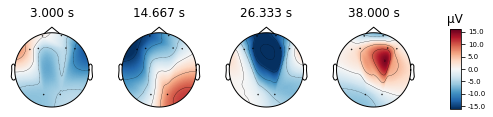

<Evoked | '1' (average, N=1), 3 – 38 sec, baseline off, 9 ch, ~634 kB>


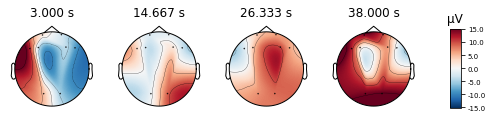

<Evoked | '1' (average, N=1), 3 – 38 sec, baseline off, 9 ch, ~634 kB>


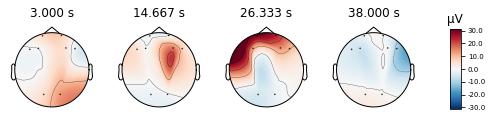

<Evoked | '1' (average, N=1), 3 – 38 sec, baseline off, 9 ch, ~634 kB>


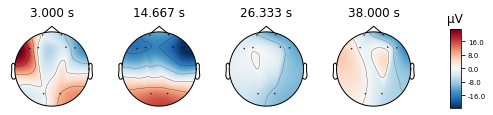

<Evoked | '6' (average, N=1), 3 – 38 sec, baseline off, 9 ch, ~634 kB>


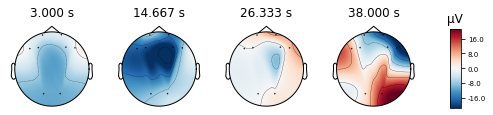

<Evoked | '6' (average, N=1), 3 – 38 sec, baseline off, 9 ch, ~634 kB>


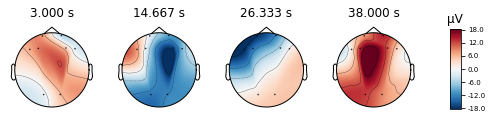

<Evoked | '6' (average, N=1), 3 – 38 sec, baseline off, 9 ch, ~634 kB>


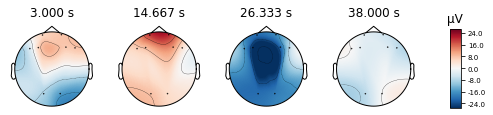

<Evoked | '6' (average, N=1), 3 – 38 sec, baseline off, 9 ch, ~634 kB>


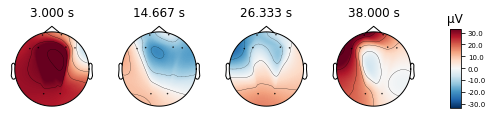

<Evoked | '10' (average, N=1), 3 – 38 sec, baseline off, 9 ch, ~634 kB>


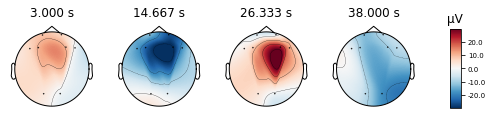

<Evoked | '10' (average, N=1), 3 – 38 sec, baseline off, 9 ch, ~634 kB>


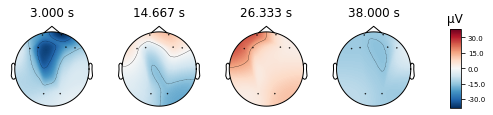

<Evoked | '10' (average, N=1), 3 – 38 sec, baseline off, 9 ch, ~634 kB>


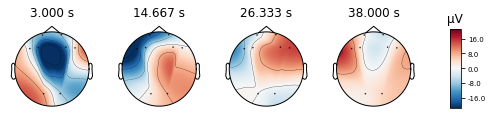

<Evoked | '10' (average, N=1), 3 – 38 sec, baseline off, 9 ch, ~634 kB>


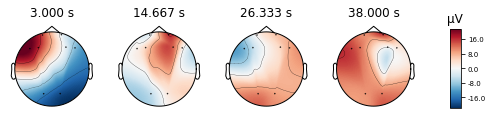

In [11]:
for index_inner, evoked in enumerate(epochs.iter_evoked()):
    print(evoked)
    evoked.plot_topomap()

In [12]:
def plot_psd(psd,freq,name):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(10,5))
    for i in range(8):
        ax.plot(freq,psd[i] ,label=raw.info['ch_names'][i], lw=1, alpha=0.6)
    # ax.fill_between(250//2, mean - std, mean + std, color='k', alpha=.5)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitube (dBV)')
    ax.set_title(f'EEG of {name}')
    ax.legend()
    plt.show()
    

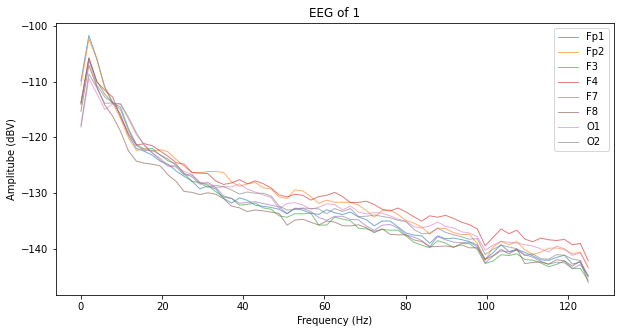

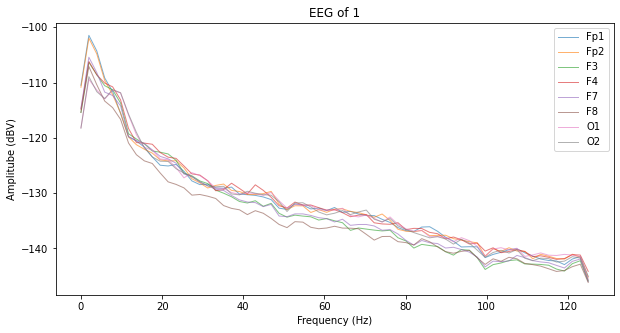

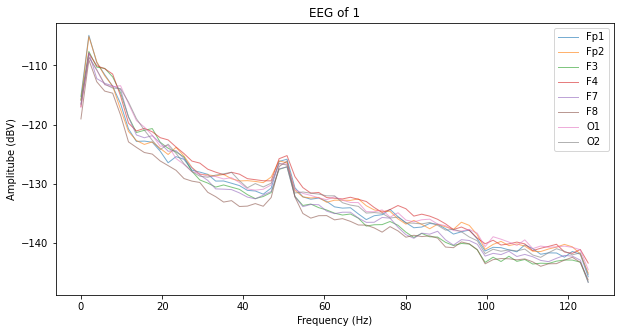

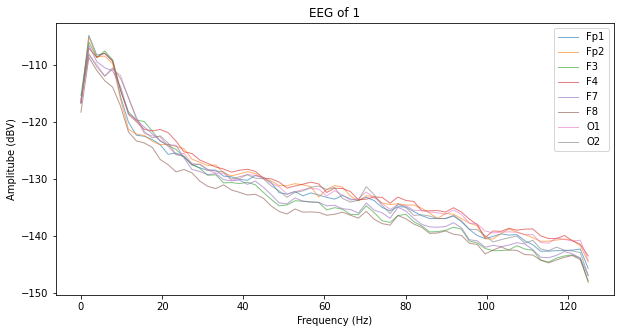

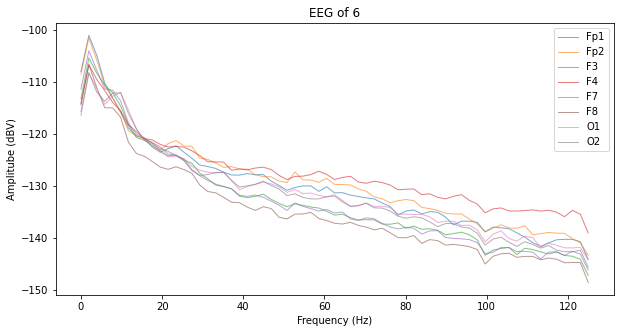

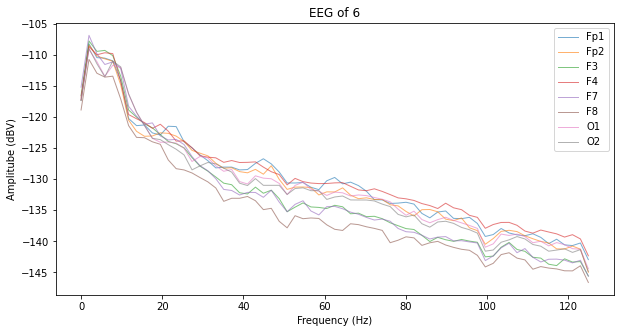

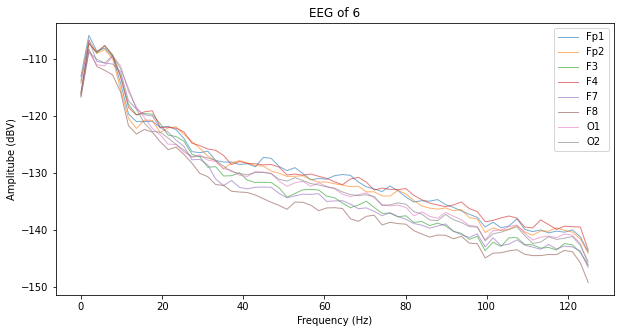

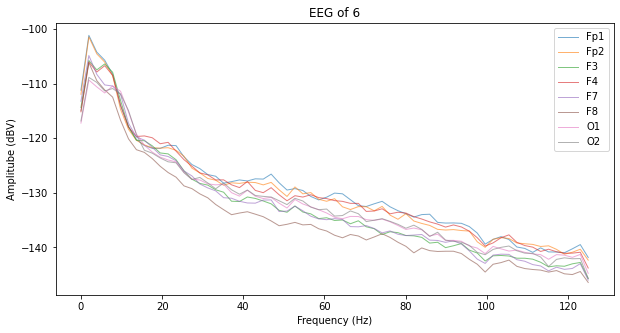

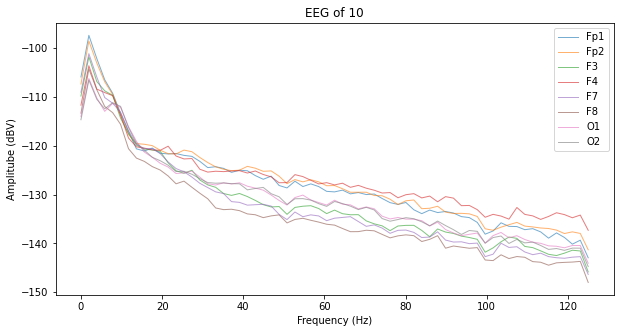

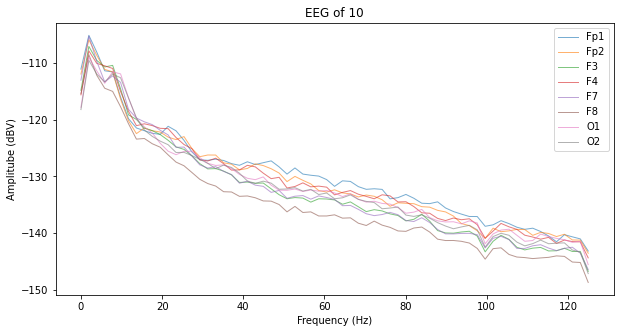

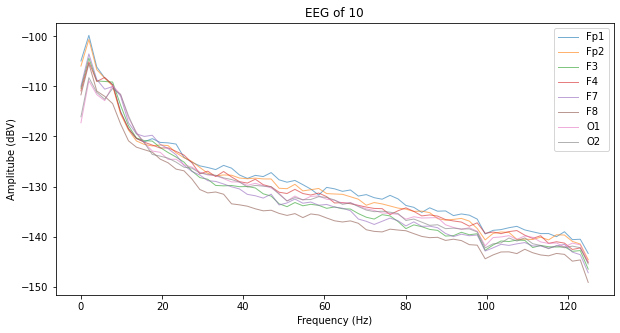

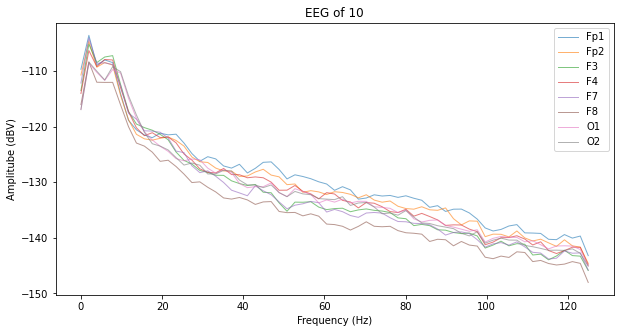

In [13]:
for index, evoked in enumerate(epochs.iter_evoked()):
    # print(index % 4)
    power,freq = mne.time_frequency.psd_welch(evoked,n_fft=128, verbose=False)
    power = 10 * np.log10(power)
    plot_psd(power,freq,evoked.comment)
    # print(power)
    # print(evoked)
# print(power)